<a href="https://colab.research.google.com/github/yashmith-r/Facebook-Marketplace-Case-Project/blob/main/new_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset...
Classes in dataset: ['Adriana Lima' 'Brie Larson' 'Chris Hemsworth' 'Chris Pratt' 'Emma Stone'
 'Emma Watson' 'Henry Cavil' 'Jimmy Fallon' 'Lionel Messi'
 'Madelaine Petsch' 'Maria Pedraza' 'Mark Ruffalo' 'Miley Cyrus'
 'Pedro Alonso' 'Selena Gomez' 'Zendaya' 'Zoe Saldana' 'barack obama'
 'barbara palvin' 'camila mendes' 'margot robbie']
Training the model...
Epoch 1/10


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.0409 - loss: 3.2445
Epoch 1: val_loss improved from inf to 3.01854, saving model to celebrity_model_blurred.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.0411 - loss: 3.2420 - val_accuracy: 0.0679 - val_loss: 3.0185
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.0843 - loss: 3.0064
Epoch 2: val_loss improved from 3.01854 to 2.94874, saving model to celebrity_model_blurred.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.0845 - loss: 3.0061 - val_accuracy: 0.1054 - val_loss: 2.9487
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.1349 - loss: 2.8873
Epoch 3: val_loss improved from 2.94874 to 2.79330, saving model to celebrity_model_blurred.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.1349 - loss: 2.8869 - val_accuracy: 0.1405 - val_loss: 2.7933
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1988 - loss: 2.6867
Epoch 4: val_loss improve

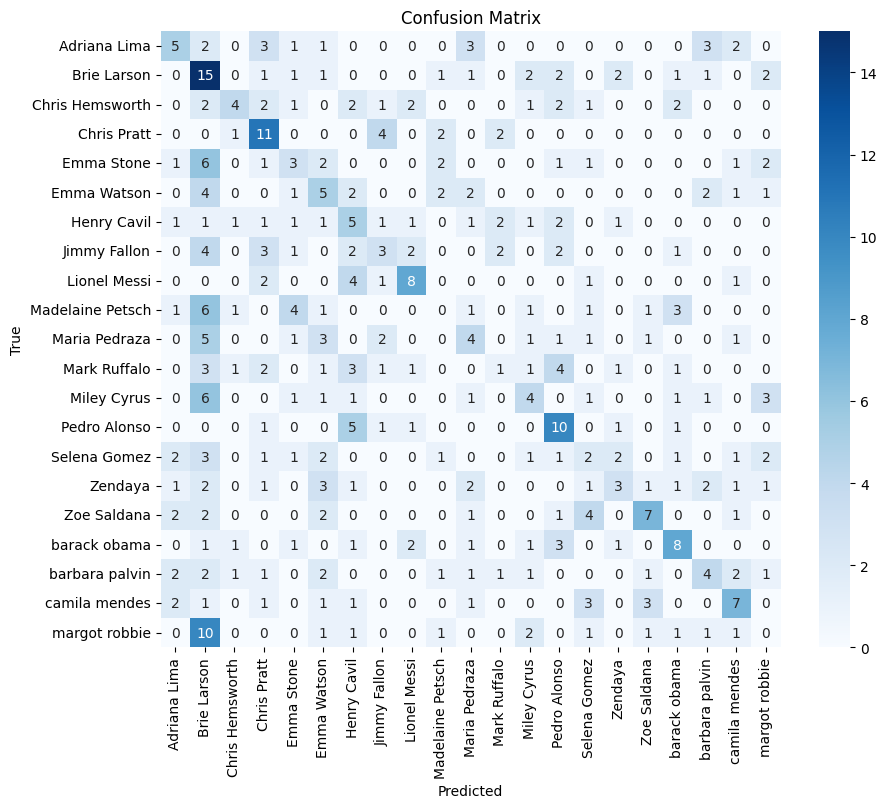

Classification Report:
                  precision    recall  f1-score   support

    Adriana Lima       0.29      0.25      0.27        20
     Brie Larson       0.20      0.50      0.29        30
 Chris Hemsworth       0.40      0.20      0.27        20
     Chris Pratt       0.35      0.55      0.43        20
      Emma Stone       0.18      0.15      0.16        20
     Emma Watson       0.19      0.25      0.21        20
     Henry Cavil       0.18      0.25      0.21        20
    Jimmy Fallon       0.21      0.15      0.18        20
    Lionel Messi       0.47      0.47      0.47        17
Madelaine Petsch       0.00      0.00      0.00        20
   Maria Pedraza       0.21      0.20      0.21        20
    Mark Ruffalo       0.12      0.05      0.07        20
     Miley Cyrus       0.25      0.20      0.22        20
    Pedro Alonso       0.34      0.50      0.41        20
    Selena Gomez       0.12      0.10      0.11        20
         Zendaya       0.27      0.15      0.19 

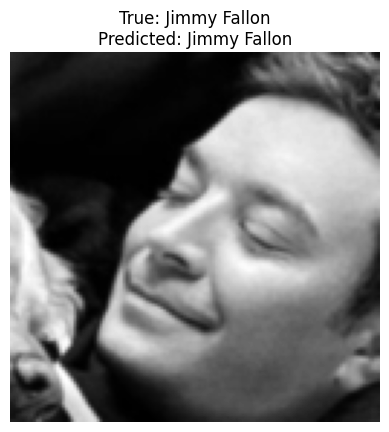

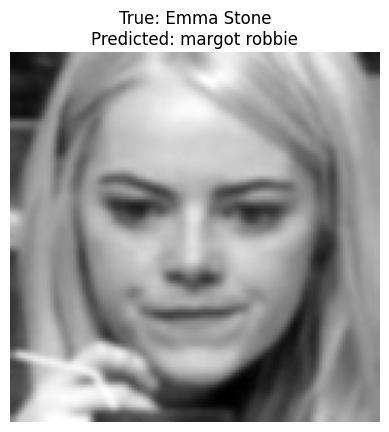

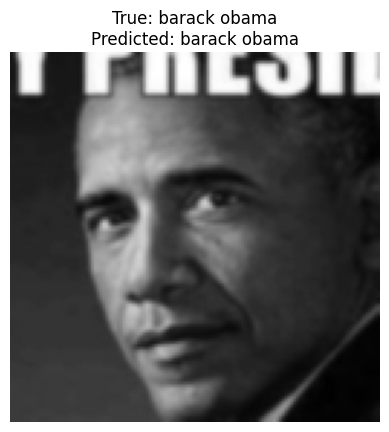

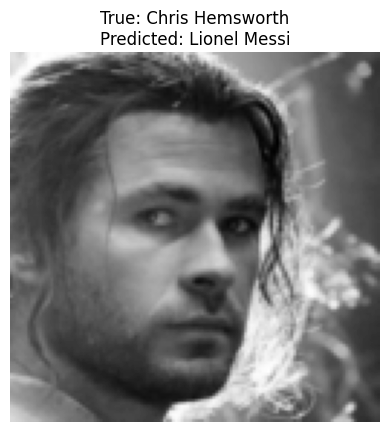

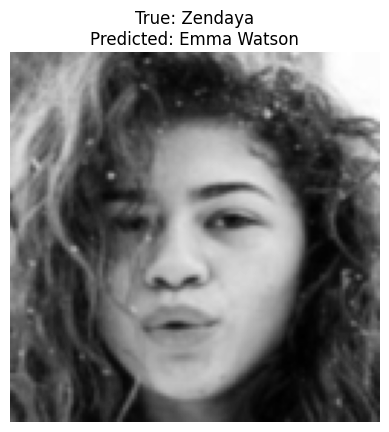

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Path to blurred dataset
DATASET_DIR = "pins_blurred"
IMG_SIZE = (128, 128)  # Resize images to this size for uniformity
BATCH_SIZE = 32
EPOCHS = 10

# Function to load and preprocess dataset
def load_dataset(dataset_dir):
    images, labels = [], []
    for person in os.listdir(dataset_dir):
        person_dir = os.path.join(dataset_dir, person)
        if not os.path.isdir(person_dir):
            continue
        for image_file in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_file)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
            if img is None:
                print(f"Warning: Could not read image {image_path}")
                continue
            img = cv2.resize(img, IMG_SIZE)  # Resize image
            images.append(img)
            labels.append(person)  # Keep folder name as label, including spaces
    return np.array(images), np.array(labels)

# Load dataset
print("Loading dataset...")
X, y = load_dataset(DATASET_DIR)

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print class names
print("Classes in dataset:", label_encoder.classes_)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Normalize images
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test / 255.0

# Reshape images to include the channel dimension
X_train = X_train.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
X_test = X_test.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('celebrity_model_blurred.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
print("Training the model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Save the final model
model.save("celebrity_model_blurred_final.keras")

# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Predict five random samples
indices = np.random.choice(len(X_test), 5, replace=False)
for idx in indices:
    img = X_test[idx].reshape(IMG_SIZE[0], IMG_SIZE[1])
    true_label = label_encoder.inverse_transform([y_test[idx]])[0]
    predicted_label = label_encoder.inverse_transform([y_pred_classes[idx]])[0]
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis("off")
    plt.show()


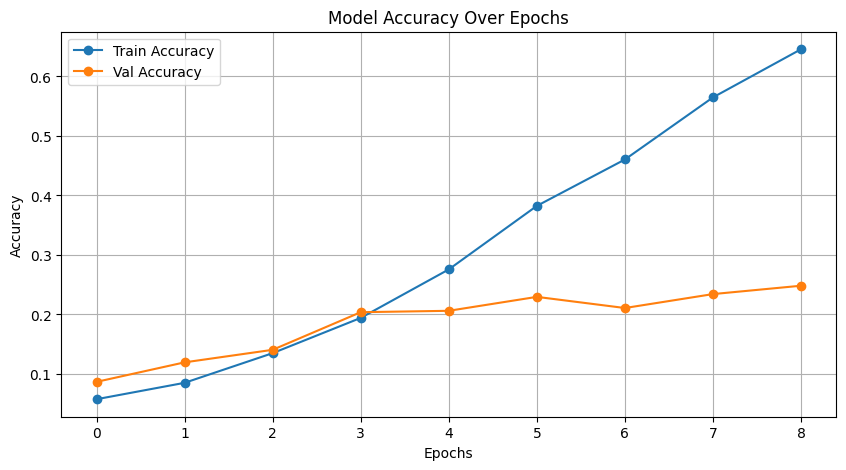

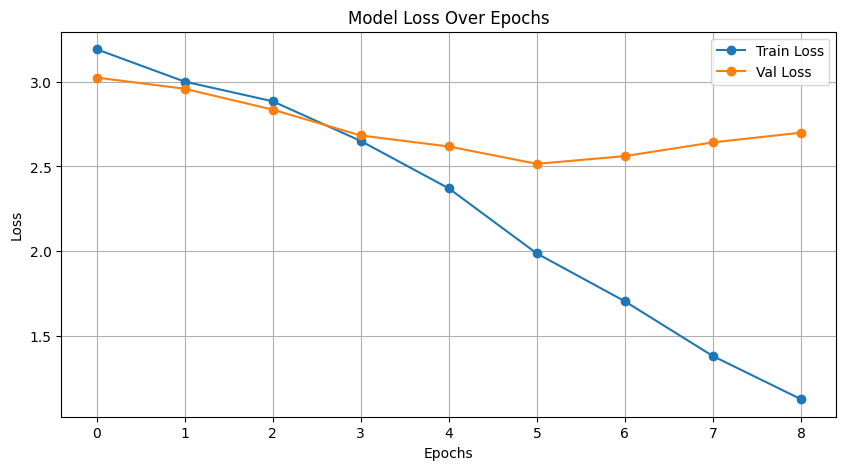

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
